In [1]:
import NetworkVisualization

In [2]:
# load libraries
import pandas as pd
import numpy as np

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns # this isn't actually required, but it makes our plots look nice
import ipywidgets
import multiprocessing 
#%matplotlib inline

import random
import itertools

from networkx.drawing.nx_agraph import graphviz_layout
import pickle
#import dzcnapy_plotlib as dzcnapy
import csv

In [3]:
#Create a directed graph using the specified node and edge files.
panama = NetworkVisualization.create_graph(node_file=[('Entities.csv', 'entities'), ('Intermediaries.csv', 'intermediaries'), ('Officers.csv', 'officers'), ('address.csv','address')],edge_file='Edges.csv')

In [4]:
print(nx.number_of_nodes(panama), nx.number_of_edges(panama))

559600 657488


In [5]:
#Calculates connected components of a graph and returns a list of networkx.Graph objects representing connected components sorted in descending order of the number of nodesand 
components = NetworkVisualization.calculate_components(panama, min_size=20)
components_nodes = [s.number_of_nodes() for s in components]
components_nodes[10:30]

[372,
 357,
 357,
 354,
 340,
 335,
 326,
 304,
 279,
 270,
 268,
 267,
 260,
 252,
 235,
 230,
 230,
 219,
 209,
 206]

In [6]:
components_nodes[135]

90

**It appears that few connected components have number of nodes in the order of 100's with one very large conncted component with 455479 nodes.**

In [7]:
#Number of connected components
len(components_nodes)

952

#### Hmmm...There are 952 connected components which is a huge number. Let us examine a few interesting ones..

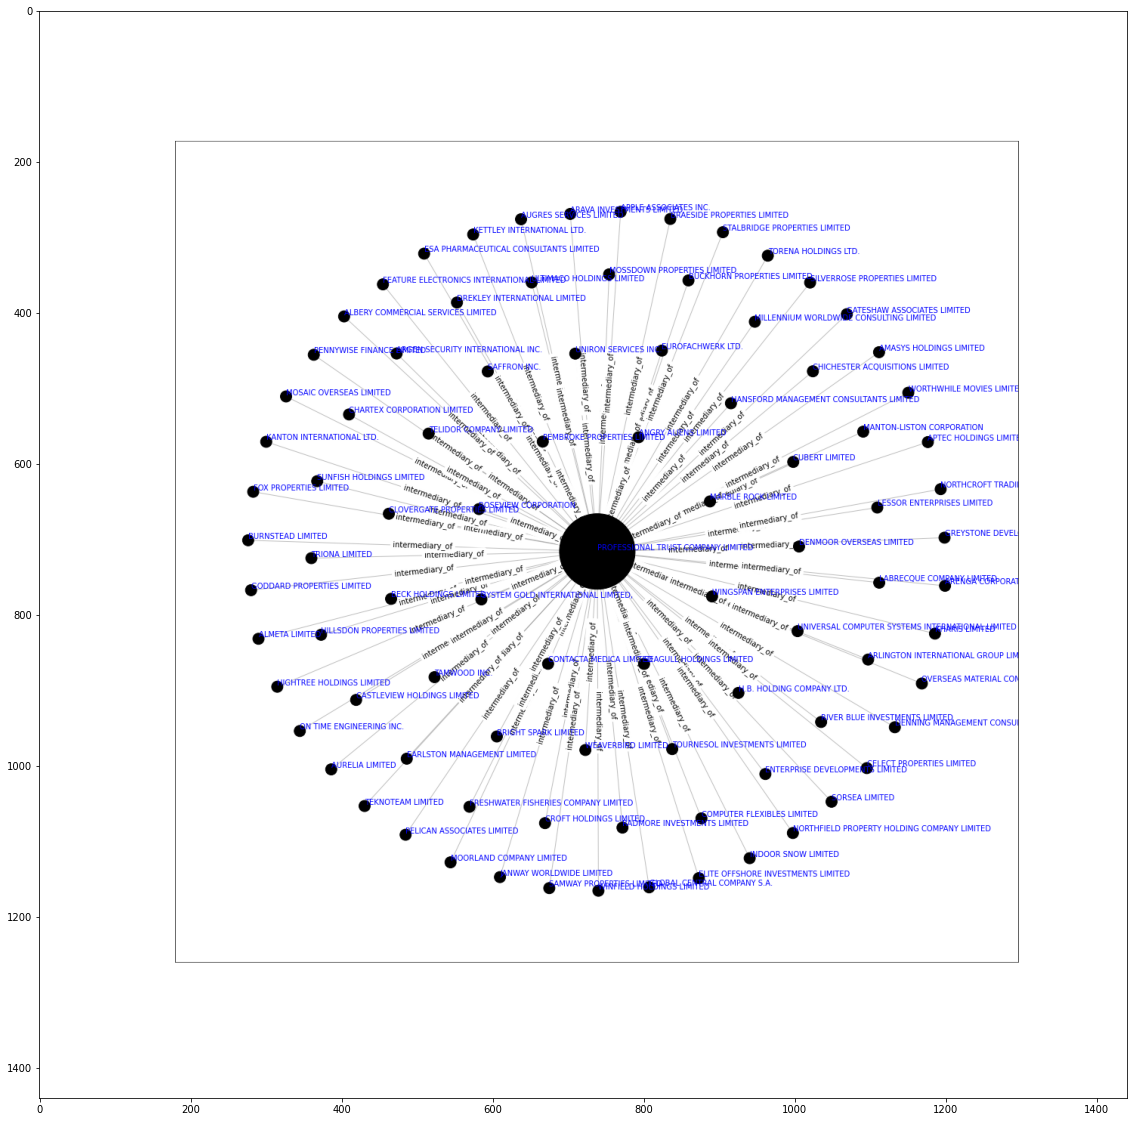

In [8]:
# Graphs with large number of nodes are a bit too cluttered to get sense out of it
NetworkVisualization.plot_graph(components[135])
fig = plt.figure(figsize=(30, 20))
    #ax = fig.add_subplot(111)
plt.imshow(plt.imread("figure.png"))
plt.show()

Few Interesting Observations: 
* In this graph we are seeing that the intermediary “PROFESSIONAL TRUST COMPANY LIMITED” is acting as the intermediate for a number of entities, in this case, are companies(what my guess is that these are shell companies- the data provided in the files is limited).

* Who is an intermediary? An intermediary is the middleman that create the entities.

* Also one interesting observation is almost always the intermediaries sit at the center of things.

* Although it helps you to explore the structures in data, the graph seems to be a bit crowded.

In [9]:
# parallelize the code using the multiprocessing module in Python, which allows you to execute multiple tasks in parallel

pool = multiprocessing.Pool()

# Create a list of arguments to pass to the plot_graph function
args_list = [X for X in components[100:106]]

# Use the pool to execute the plot_graph function on each argument in parallel
pool.map(NetworkVisualization.plot_graph, args_list)

# Close the pool and wait for all tasks to complete
pool.close()
pool.join()

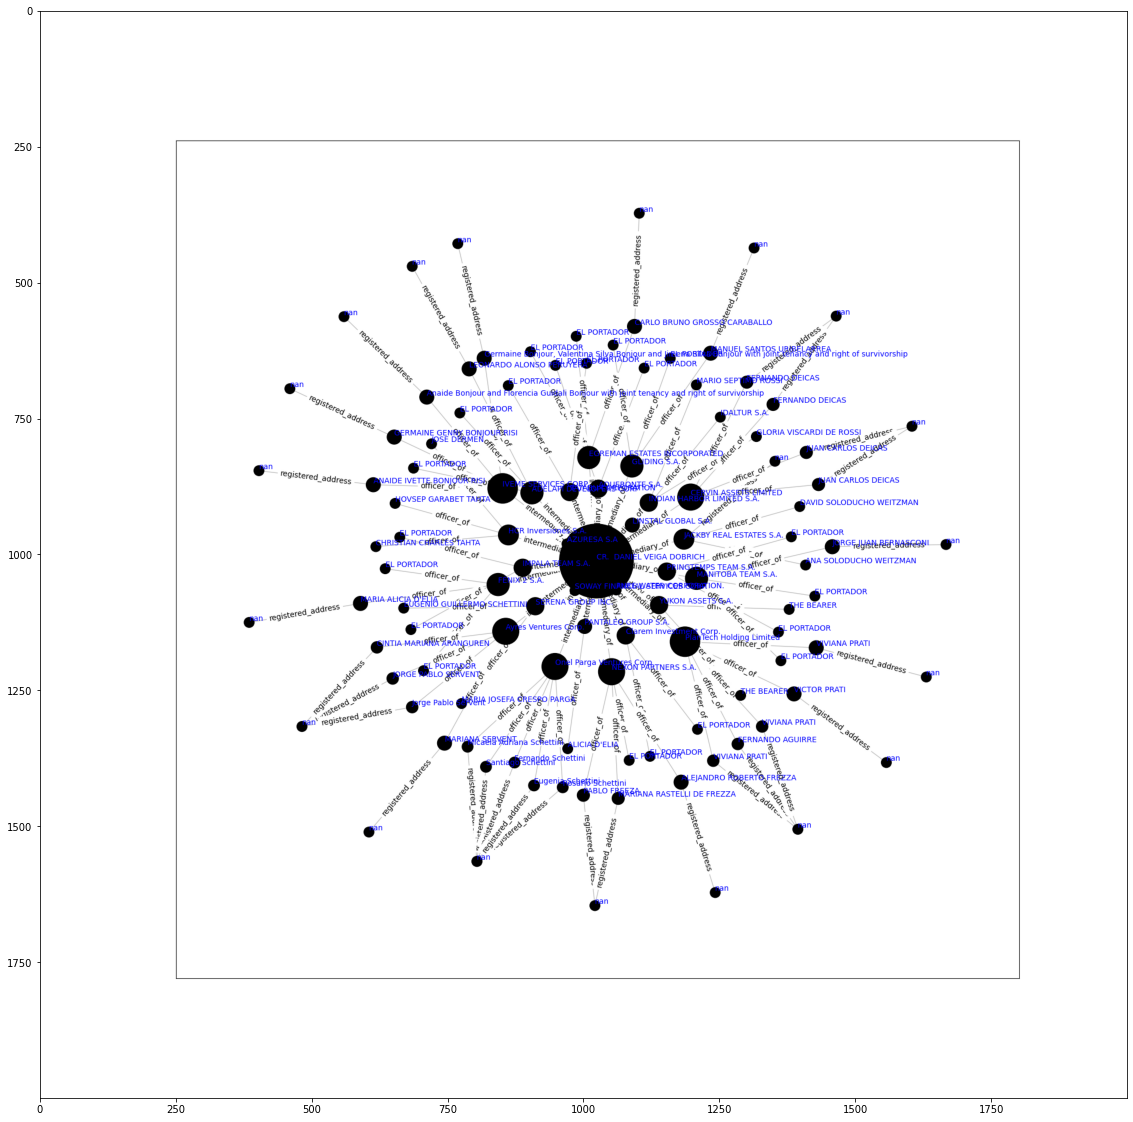

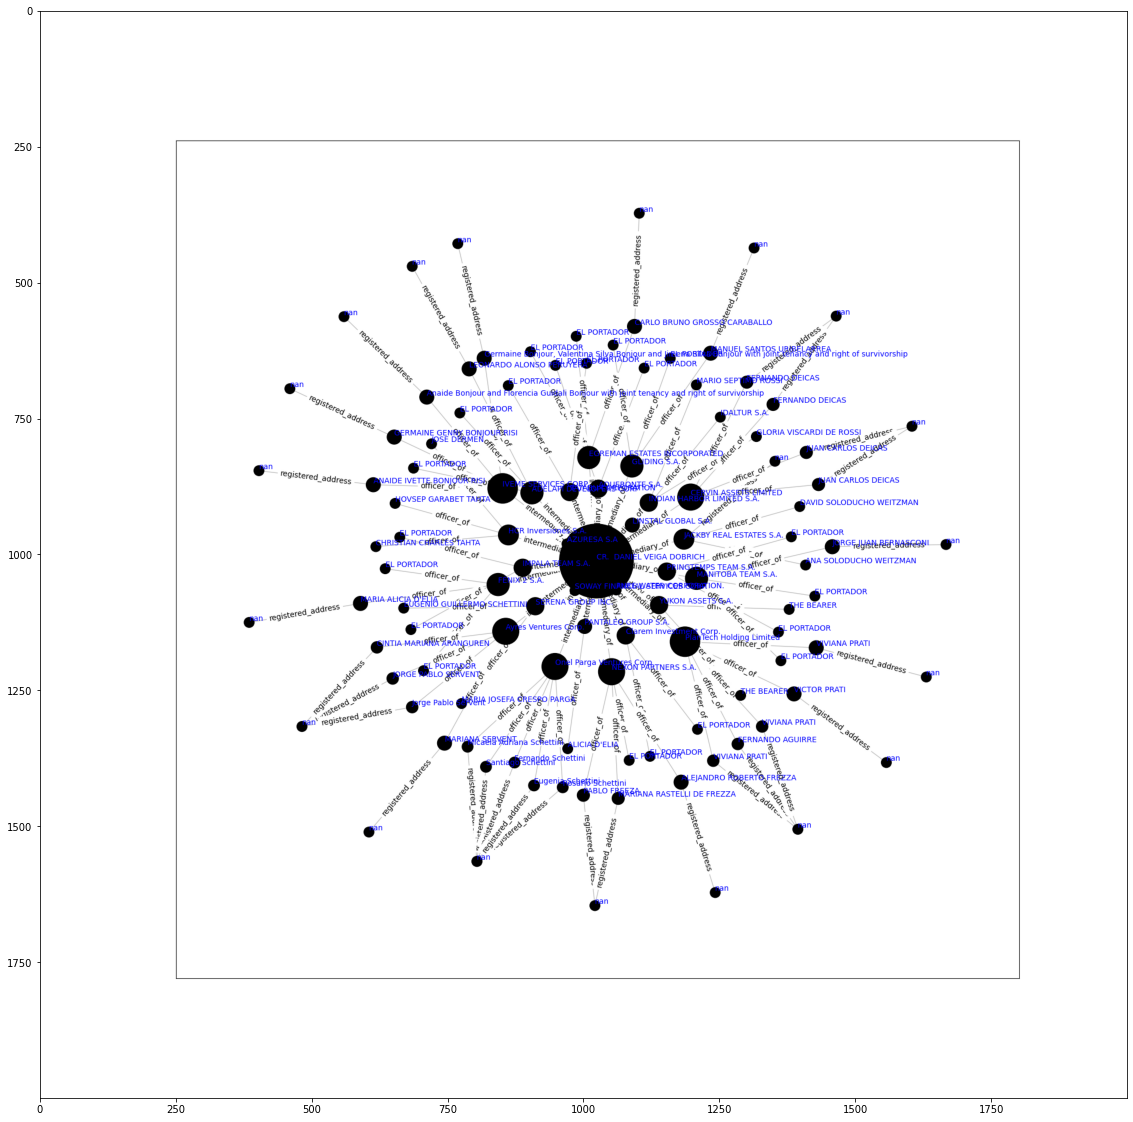

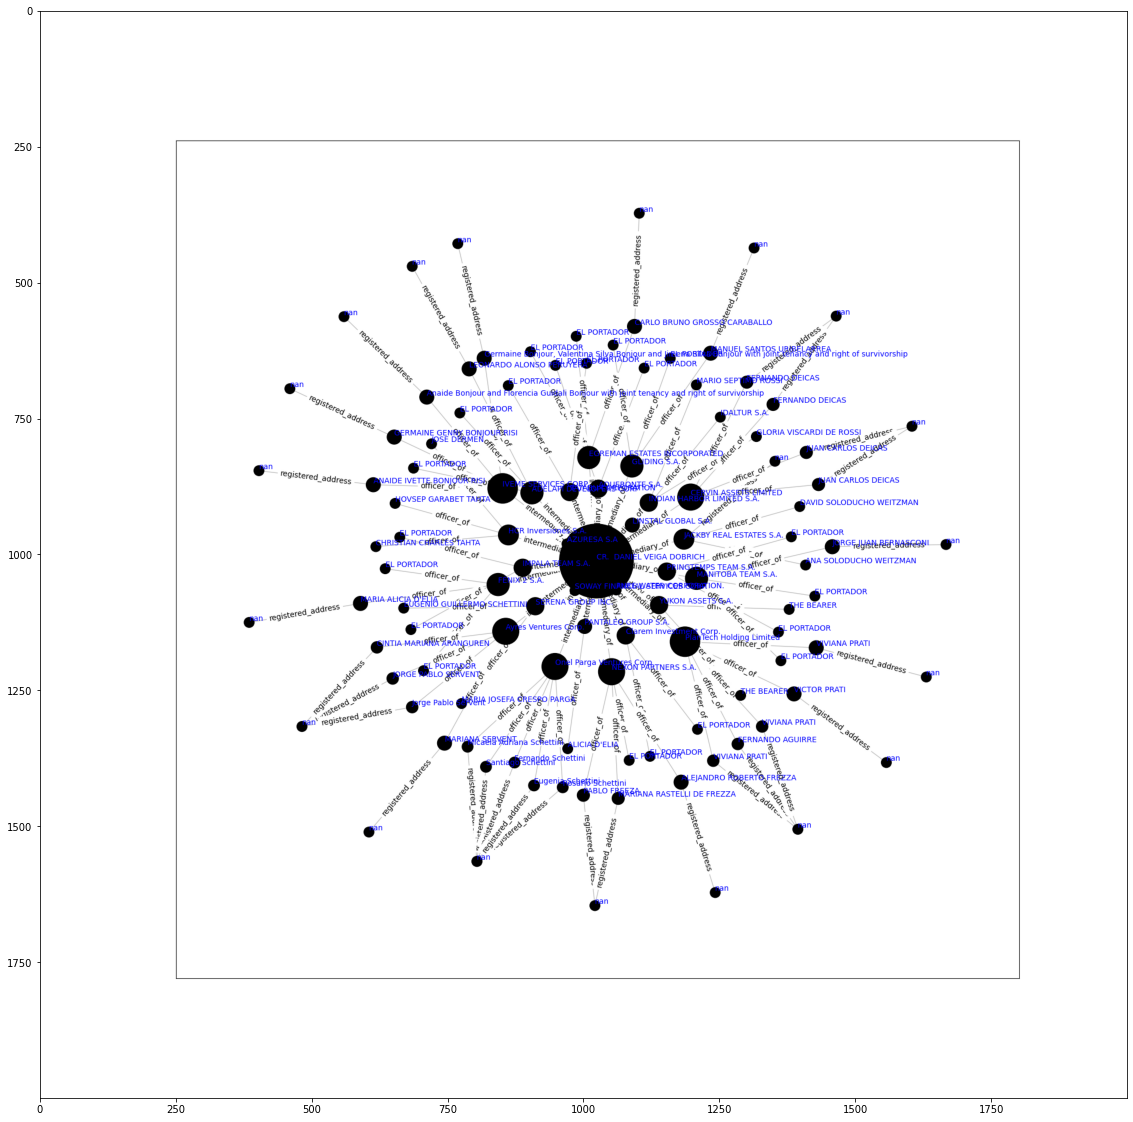

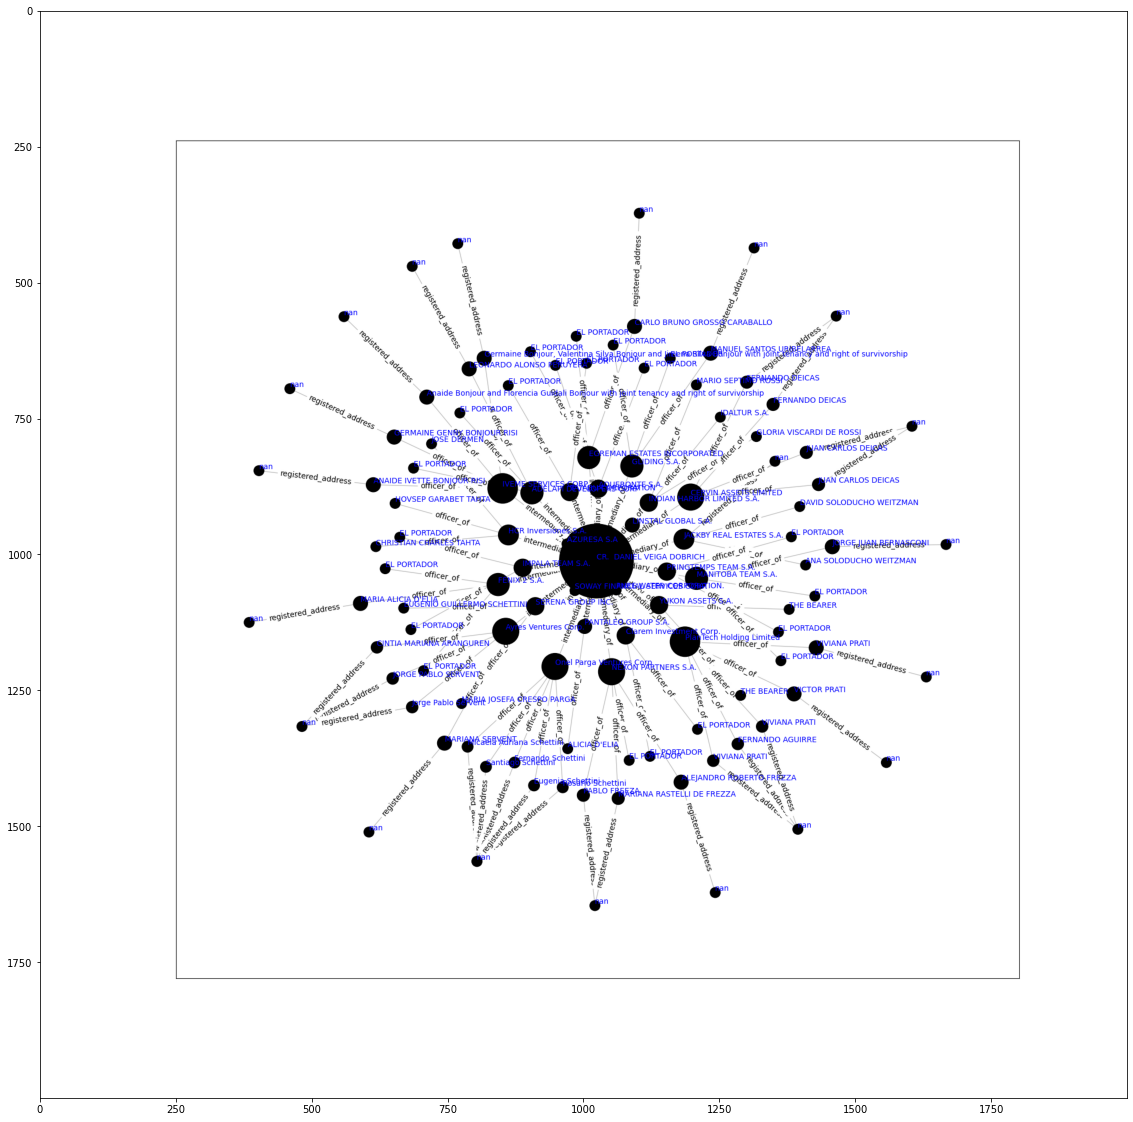

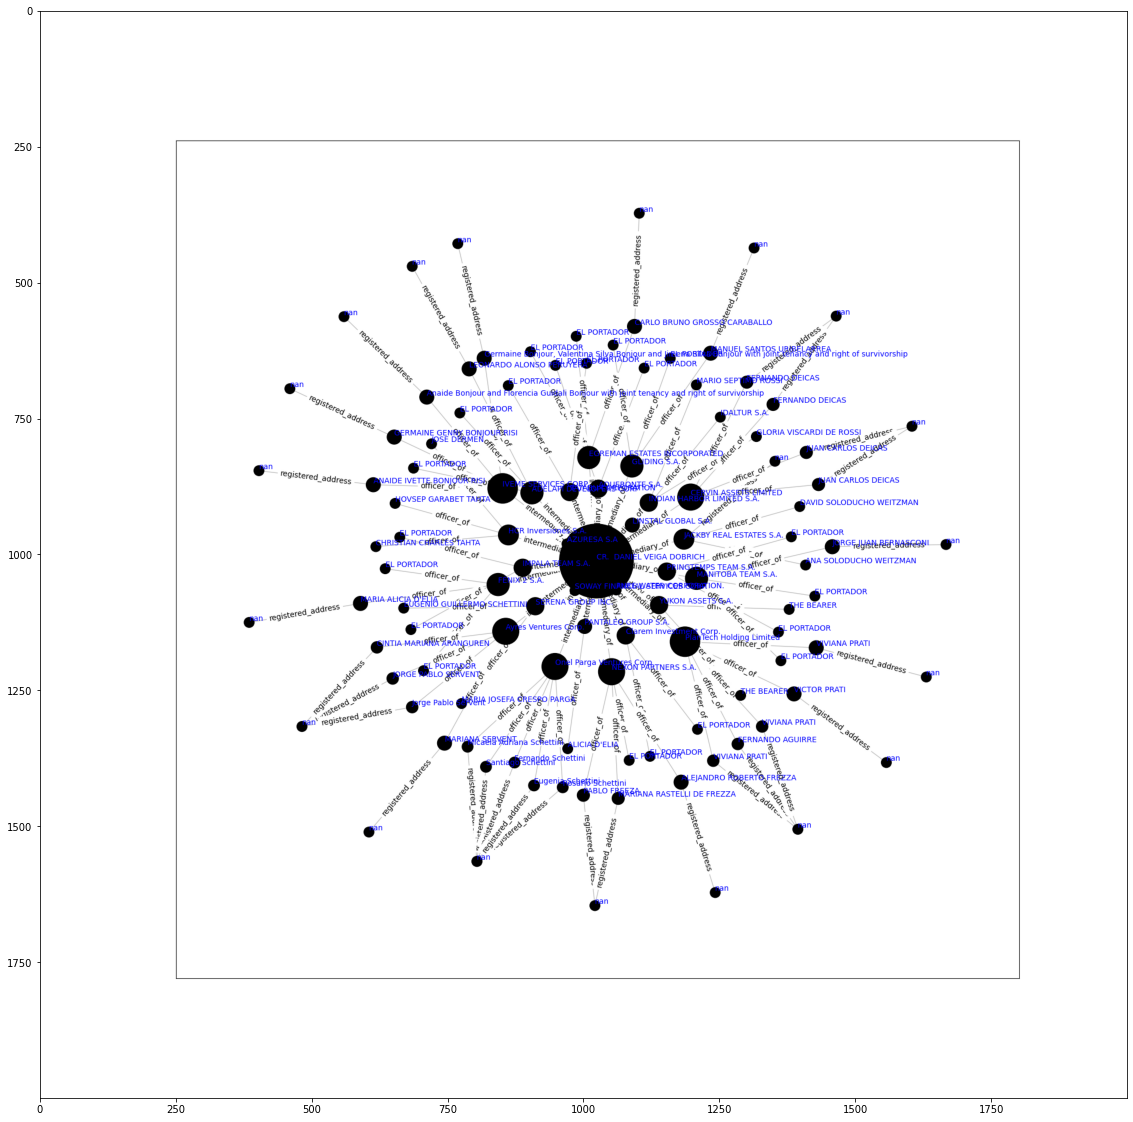

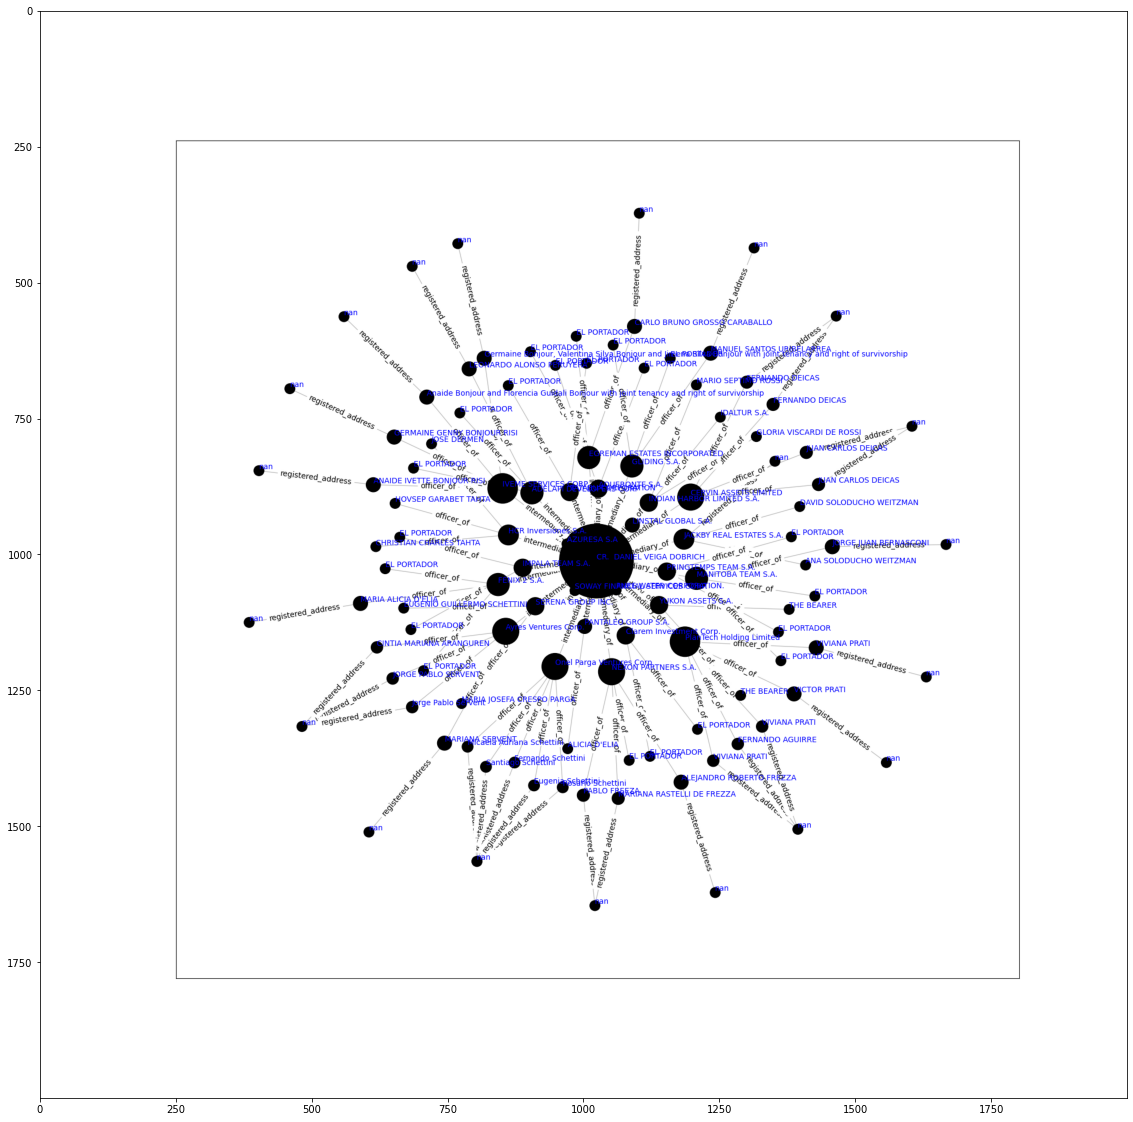

In [10]:
# display the figures
for i in range(len(components_nodes[100:106])):
    fig = plt.figure(figsize=(30, 20))
    ax = fig.add_subplot(111)
    ax.imshow(plt.imread("figure.png"))
    plt.show()

*As you can see above, as the graph sizes grow and at some point the data becomes impossible to visualise in a concise manner.*

**So now the question is how to explore graphs with large number of nodes? Well there are several ways to do this. Some functions that would aid in interpretating network plots are as follows:**

* __Centrality__ - Eigenvector centrality scores correspond to the values of the first eigenvector of the graph adjacency matrix; these scores may, in turn, be interpreted as arising from a reciprocal process in which the centrality of each node is proportional to the sum of the centralities of those nodes to which it is connected to.

* __Degree__ - The degree of a vertex is its most basic structural property, the number of its adjacent edges.

* __Page Rank__ - Another common and most popular measure to calculate the importance of each node looking at degree.

* __Community/Clusters__ - This function tries to find densely connected subgraphs, also called communities in a graph via random walks. The idea is that short random walks tend to stay in the same community.

*What I plan to use is Degree Analysis and Page Rank algorithm to explore the relationships between data points.*

**So, for this, we will try and analyze the largest subgraph with 455479 nodes. This analysis can be repeated for the other subgraphs as well.**

### Centrality

In [11]:
largest_subgraph = components[0]

In [12]:
degree_centrality = dict(nx.degree_centrality(largest_subgraph))

In [13]:
Centrality_attributes = NetworkVisualization.compute_node_attributes(degree_centrality,largest_subgraph,panama)

In [14]:
centrality_df = pd.DataFrame.from_dict({"name": Centrality_attributes[n]['name'], "node_type": Centrality_attributes[n]['node_type'], "degree": degree_centrality[n]} for n in Centrality_attributes.keys() if n in degree_centrality.keys())


In [15]:
centrality_df.head(10)

,name,node_type,degree
0,"TIANSHENG INDUSTRY AND TRADING CO., LTD.",entities,0.000007
1,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",entities,0.000007
2,"HOTFOCUS CO., LTD.",entities,0.000009
3,"SKY-BLUE GIFTS & TOYS CO., LTD.",entities,0.000007
4,8808 HOLDING LIMITED,entities,0.000007
5,KENT DEVELOPMENT LIMITED,entities,0.000007
6,BONUS TRADE LIMITED,entities,0.000007
7,AMARANDAN LTD.,entities,0.000011
8,NEW IDEA LIMITED,entities,0.000007
9,HUGH POWER LIMITED,entities,0.000007


In [16]:
# Sort nodes by degree in descending order and display the top 20 nodes
centrality_df.sort_values(by=['degree'], ascending=False)[0:30]

,name,node_type,degree
170054,ORION HOUSE SERVICES (HK) LIMITED,intermediaries,0.015404
172271,MOSSACK FONSECA & CO.,intermediaries,0.009581
172307,PRIME CORPORATE SOLUTIONS SARL,intermediaries,0.009039
170038,OFFSHORE BUSINESS CONSULTANT (INT'L) LIMITED,intermediaries,0.008988
171487,MOSSACK FONSECA & CO. (SINGAPORE) PTE LTD.,intermediaries,0.008536
301804,MOSSFON SUBSCRIBERS LTD.,officers,0.008525
171776,CONSULCO INTERNATIONAL LIMITED,intermediaries,0.006955
172214,MOSSACK FONSECA & CO. (U.K.) LIMITED,intermediaries,0.005572
171731,MOSSACK FONSECA & CO. (PERU) CORP.,intermediaries,0.004512
171745,"POWER POINT INT'L CO., LTD.",intermediaries,0.004490


### Degree Analysis

In [17]:
#Calculate degree for nodes in largest subgraph
degree_analysis_df = NetworkVisualization.calculate_degree(largest_subgraph,panama,page_rank=False)

In [18]:
degree_analysis_df

,node_type,degree,name
10000001,entities,3,"TIANSHENG INDUSTRY AND TRADING CO., LTD."
10000002,entities,3,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD."
10000003,entities,4,"HOTFOCUS CO., LTD."
10000004,entities,3,"SKY-BLUE GIFTS & TOYS CO., LTD."
10000006,entities,3,8808 HOLDING LIMITED
...,...,...,...
14108915,address,25,NaN
14108931,address,1,NaN
14108969,address,1,NaN
14109090,address,1,NaN


In [19]:
# Sort nodes by degree in descending order and display the top 20 nodes
degree_analysis_df.sort_values(by=['degree'], ascending=False)[0:30]

,node_type,degree,name
11001746,intermediaries,7016,ORION HOUSE SERVICES (HK) LIMITED
11011863,intermediaries,4364,MOSSACK FONSECA & CO.
11012037,intermediaries,4117,PRIME CORPORATE SOLUTIONS SARL
11001708,intermediaries,4094,OFFSHORE BUSINESS CONSULTANT (INT'L) LIMITED
11008027,intermediaries,3888,MOSSACK FONSECA & CO. (SINGAPORE) PTE LTD.
12160432,officers,3883,MOSSFON SUBSCRIBERS LTD.
11009351,intermediaries,3168,CONSULCO INTERNATIONAL LIMITED
11011539,intermediaries,2538,MOSSACK FONSECA & CO. (U.K.) LIMITED
11009139,intermediaries,2055,MOSSACK FONSECA & CO. (PERU) CORP.
11009218,intermediaries,2045,"POWER POINT INT'L CO., LTD."


The highest centrality, degreeness is almost always intermediaries. This is because we can conclude that intermediaries tend to sit at the centre of things.

Since intermediaries help create the entities, each intermediary should be connected to many entities as observed already.

One intermediary I can recognize is Mossack Fonseca, the Panamanian offshore law firm and corporate service provider. Infact, The leaked documents are from the database of Mossack Fonseca.

In [21]:
def plot_path(largest_subgraph, path):
    """
    Plot the path on a graph.

    :param largest_subgraph: The graph to plot the path on.
    :param path: The path to plot.
    :return: None
    """
    NetworkVisualization.plot_graph(largest_subgraph.subgraph(path))
    fig = plt.figure(figsize=(30, 20))
    #ax = fig.add_subplot(111)
    plt.imshow(plt.imread("figure.png"))
    plt.show()


#### Let's explore how it is connected to other intermediaries like ORION HOUSE SERVICES 

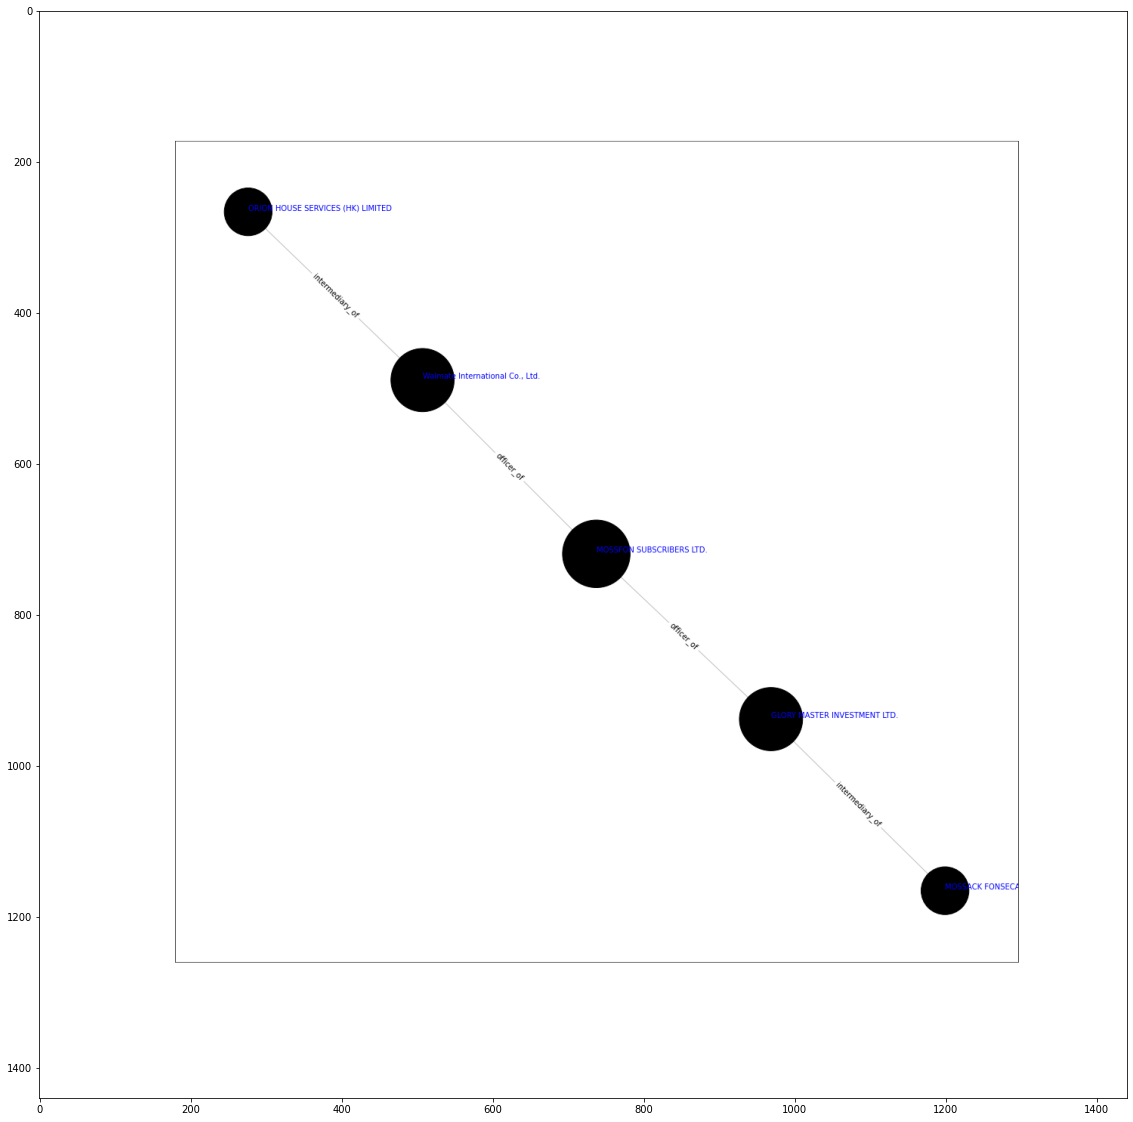

In [22]:
# The relationship between MOSSACK FONSECA & CO. and ORION HOUSE SERVICES (HK) LIMITED:
path = nx.shortest_path(largest_subgraph, source=11011863, target=11001746)
plot_path(largest_subgraph, path)

The two intermediaries are connected together through companies that share a common director, Mossfon Subscribers Ltd.

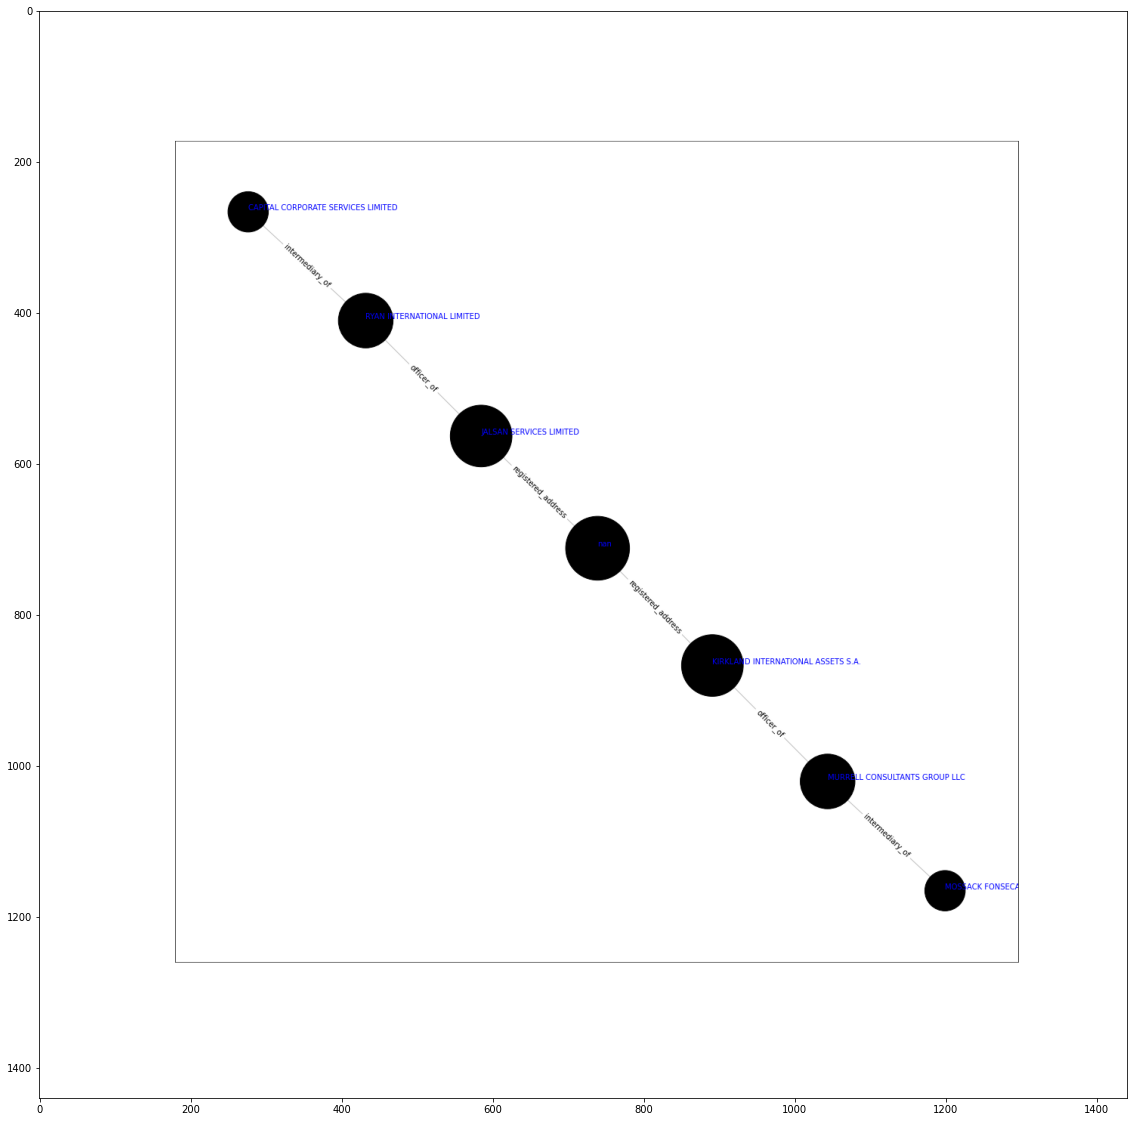

In [23]:
# The relationship between “Mossack Fonseca Co.,Ltd” and “CAPITAL CORPORATE SERVICES LIMITED”:
path = nx.shortest_path(largest_subgraph, source=11011863, target=11011469)
plot_path(largest_subgraph, path)

The two intermediaries are connected together through companies that share a common registered address.

We can also use functions like ego_graph that returns induced subgraph of neighbors centered at node n within a given radius.